In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
NNW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#27 NNW1.csv.csv")
NNW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#28 NNW2.csv.csv")
NNW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#29 NNW3.csv.csv")
NNW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#30 NNW4.csv.csv")
NNW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#31 NNW5.csv.csv")

In [3]:
#Loading the corresponding force data
force_NNW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#27 NNW1.log" , delimiter = "\t")
force_NNW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#28 NNW2.log" , delimiter = "\t")
force_NNW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#29 NNW3.log" , delimiter = "\t")
force_NNW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#30 NNW4.log" , delimiter = "\t")
force_NNW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#31 NNW5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #2 - 6 - NNW1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_NNW1 = force_NNW1["Time"]
x_force_NNW2 = force_NNW2["Time"]
x_force_NNW3 = force_NNW3["Time"]
x_force_NNW4 = force_NNW4["Time"]
x_force_NNW5 = force_NNW5["Time"]

#force
Load_NNW1 = force_NNW1["Load"]
Load_NNW2 = force_NNW2["Load"]
Load_NNW3 = force_NNW3["Load"]
Load_NNW4 = force_NNW4["Load"]
Load_NNW5 = force_NNW5["Load"]

#plt.plot(x_force_NNW1,Load_NE1,color = 'green', label = 'force data NNW1 test #27' )
#plt.plot(x_force_NNW2,Load_NE2,color = 'blue', label = 'force data NNW2 test #28' )
# plt.plot(x_force_NNW3,Load_NE3,color = 'yellow', label = 'force data NNW3 test #29' )
# plt.plot(x_force_NNW4,Load_NE4,color = 'red', label = 'force data NNW4 test #30' )
# plt.plot(x_force_NNW5,Load_NE5,color = 'brown', label = 'force data NNW5 test #31' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for NNW1


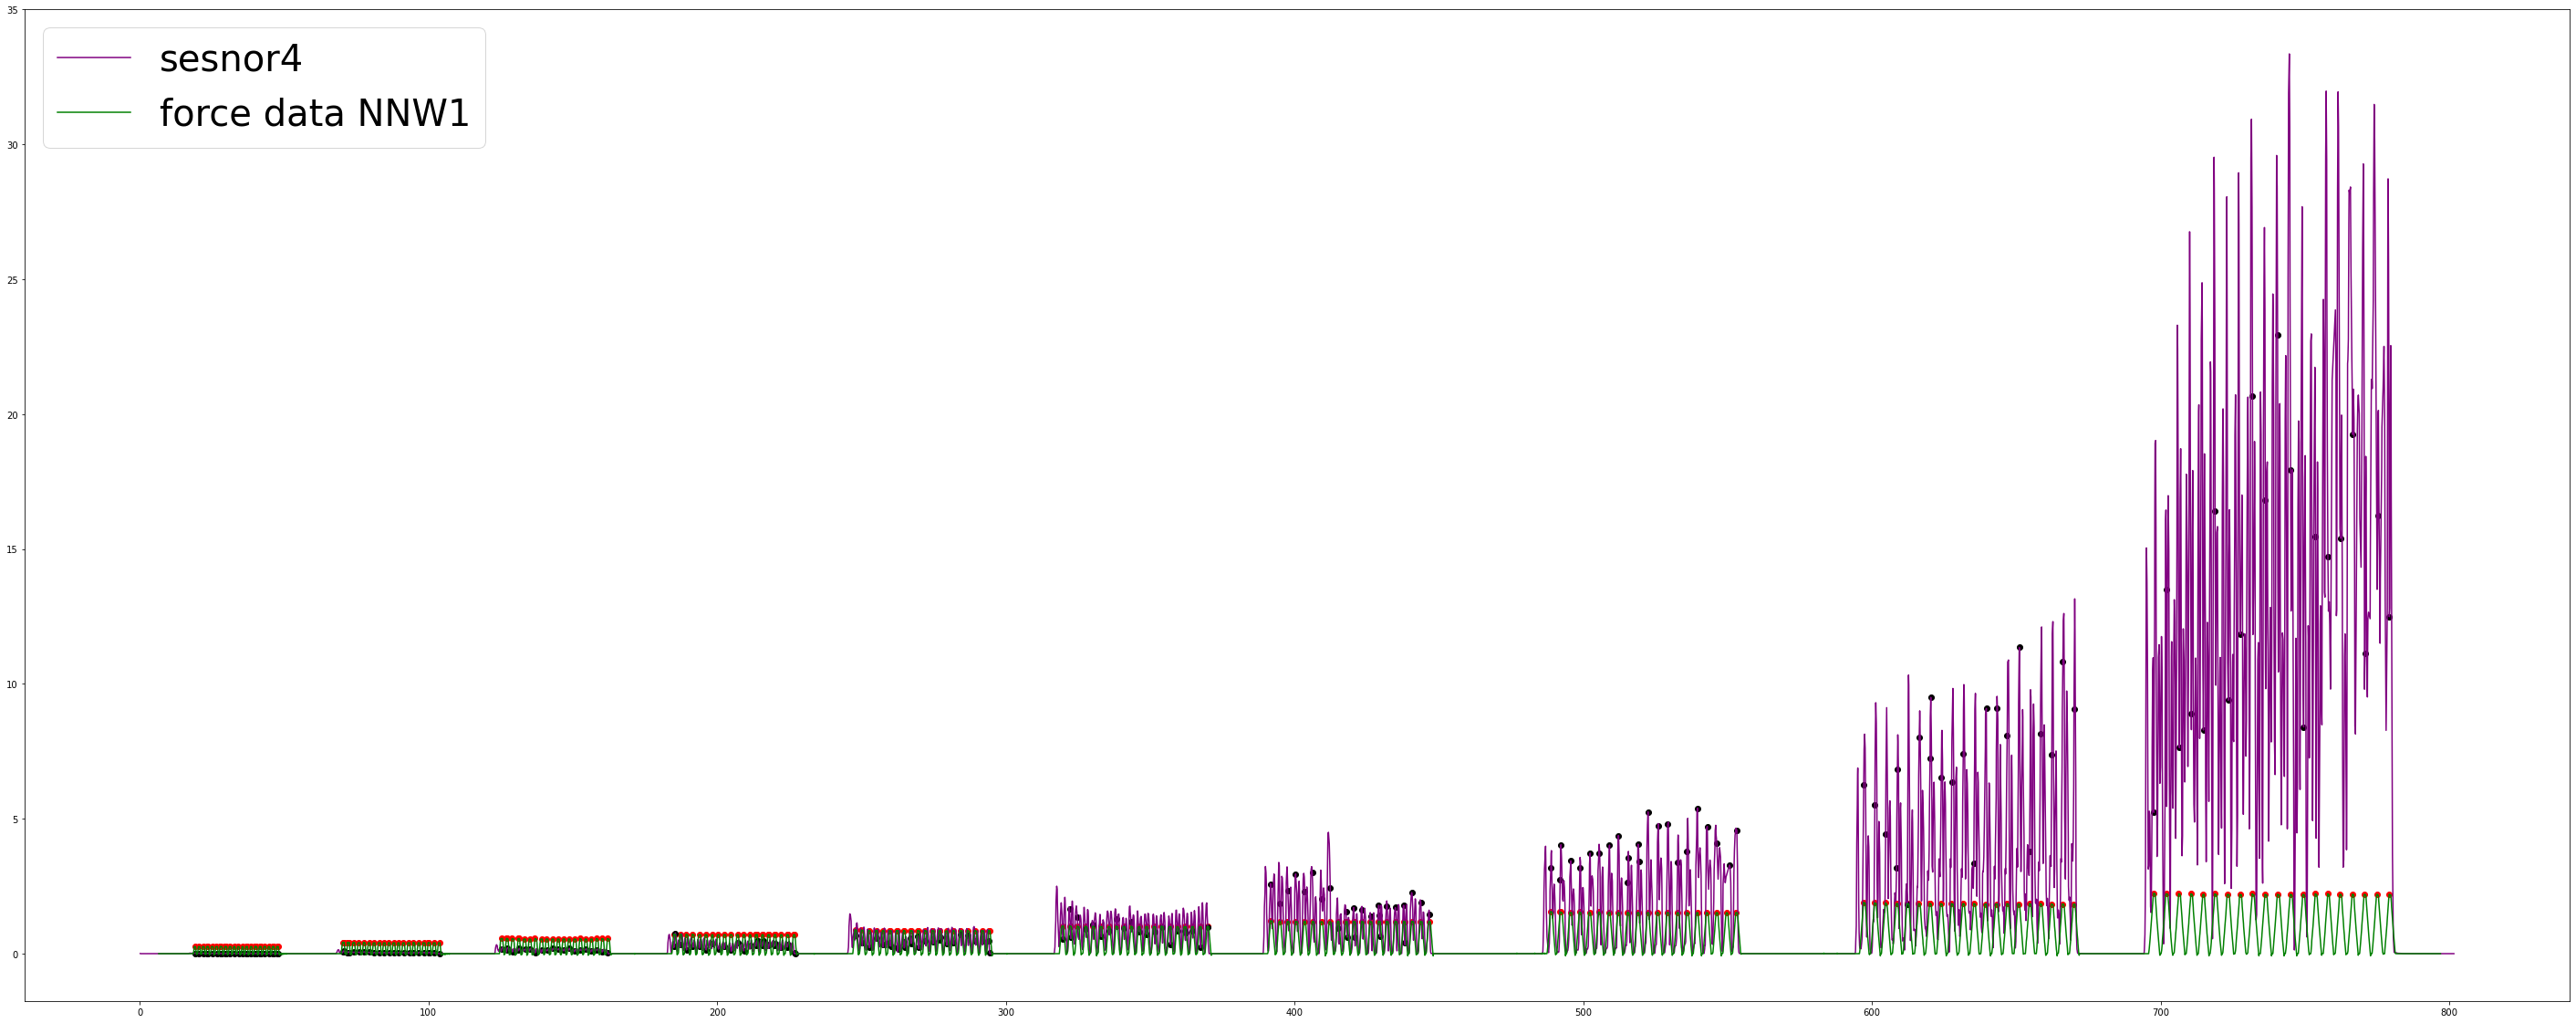

In [10]:
#visualizing the resistance data for each sensor NNW 1- 5 - NNW1

plt.figure(figsize=(50, 20))

# plt.plot(NNW1["Unnamed: 0"],NNW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNW1["Unnamed: 0"],NNW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNW1["Unnamed: 0"],NNW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNW1["Unnamed: 0"],NNW1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNW1 = x_force_NNW1 + 6.5
scaled_NNW1 = NNW1["Unnamed: 0"]

plt.plot(scaled_NNW1,NNW1["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NNW1,Load_NNW1,color = 'green', label = 'force data NNW1' )

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NNW1")

#finding the peaks

pidx_Load_NNW1, _ = find_peaks(Load_NNW1,prominence= 0.2 )
peaks_Load_NNW1 = Load_NNW1[pidx_Load_NNW1]
peaks_Ltime_NNW1 = scaled_x_force_NNW1[pidx_Load_NNW1]

plt.scatter(peaks_Ltime_NNW1,peaks_Load_NNW1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNW1time = []

peaks_Ltime_NNW1.reset_index(drop = True, inplace = True)
peaks_Load_NNW1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNW1)):
    idx_NNW1time.append(bisect.bisect_left(NNW1["Unnamed: 0"], peaks_Ltime_NNW1[i]))

plt.scatter(NNW1["Unnamed: 0"][idx_NNW1time],NNW1["s4_d"][idx_NNW1time],color = 'black')

In [11]:
#Storing the peaks into csv file - NNW1
Load_NNW1peaks =[]

for i in range(len(peaks_Load_NNW1)):
    Load_NNW1peaks.append(peaks_Load_NNW1[i])
    
content_NNW1 = {'R1':NNW1["s1_d"][idx_NNW1time],
              'R2':NNW1["s2_d"][idx_NNW1time],
              'R3':NNW1["s3_d"][idx_NNW1time],
              'R4':NNW1["s4_d"][idx_NNW1time], 
              'Load': Load_NNW1peaks} 

df_NNW1 = pd.DataFrame(content_NNW1, columns = ['R1','R2','R3','R4','Load'])

df_NNW1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNW1.csv',index = False, header = True)

Sensor 1 is more profound for NNW2


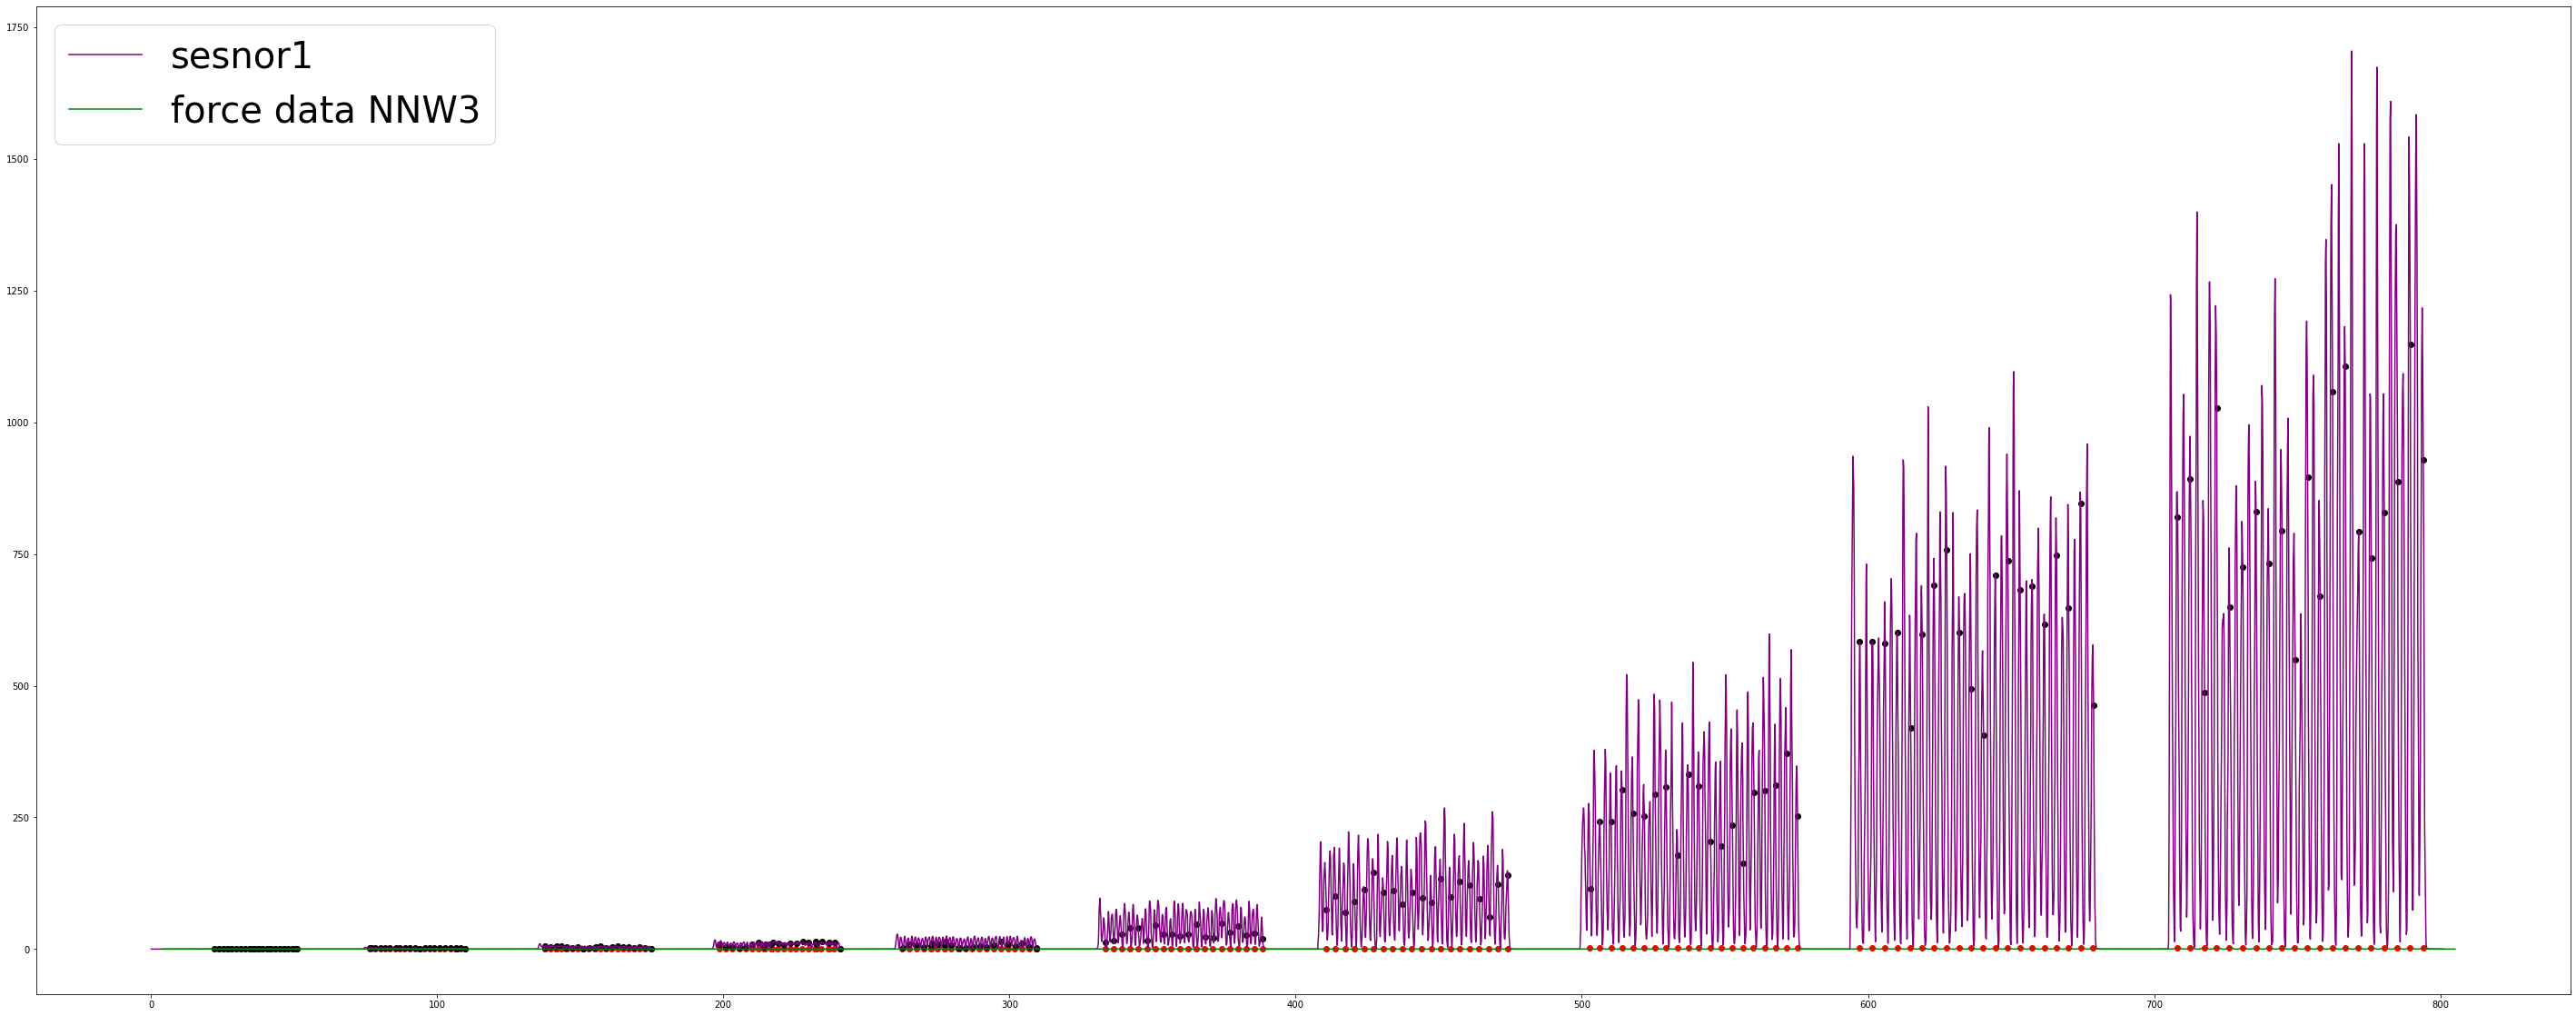

In [14]:
#visualizing the resistance data for each sensor NNW 1- 5 - NNW2

plt.figure(figsize=(50, 20))

# plt.plot(NNW2["Unnamed: 0"],NNW2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNW2["Unnamed: 0"],NNW2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNW2["Unnamed: 0"],NNW2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNW2["Unnamed: 0"],NNW2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNW2 = x_force_NNW2 + 4
scaled_NNW2 = NNW2["Unnamed: 0"]

plt.plot(scaled_NNW2,NNW2["s1_d"], color = 'purple', label = 'sesnor1')
plt.plot(scaled_x_force_NNW2,Load_NNW2,color = 'green', label = 'force data NNW3')

plt.legend(fontsize=40)

print("Sensor 1 is more profound for NNW2")

#finding the peaks

pidx_Load_NNW2, _ = find_peaks(Load_NNW2,prominence= 0.1 )
peaks_Load_NNW2 = Load_NNW2[pidx_Load_NNW2]
peaks_Ltime_NNW2 = scaled_x_force_NNW2[pidx_Load_NNW2]

plt.scatter(peaks_Ltime_NNW2,peaks_Load_NNW2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNW2time = []

peaks_Ltime_NNW2.reset_index(drop = True, inplace = True)
peaks_Load_NNW2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNW2)):
    idx_NNW2time.append(bisect.bisect_left(NNW2["Unnamed: 0"], peaks_Ltime_NNW2[i]))

plt.scatter(NNW2["Unnamed: 0"][idx_NNW2time],NNW2["s1_d"][idx_NNW2time],color = 'black')

In [15]:
#Storing the peaks into csv file - NNW2
Load_NNW2peaks =[]

for i in range(len(peaks_Load_NNW2)):
    Load_NNW2peaks.append(peaks_Load_NNW2[i])
    
content_NNW2 = {'R1':NNW2["s1_d"][idx_NNW2time],
              'R2':NNW2["s2_d"][idx_NNW2time],
              'R3':NNW2["s3_d"][idx_NNW2time],
              'R4':NNW2["s4_d"][idx_NNW2time], 
              'Load': Load_NNW2peaks} 

df_NNW2 = pd.DataFrame(content_NNW2, columns = ['R1','R2','R3','R4','Load'])

df_NNW2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNW2.csv',index = False, header = True)

Sensor 1 is more profound for NNW3


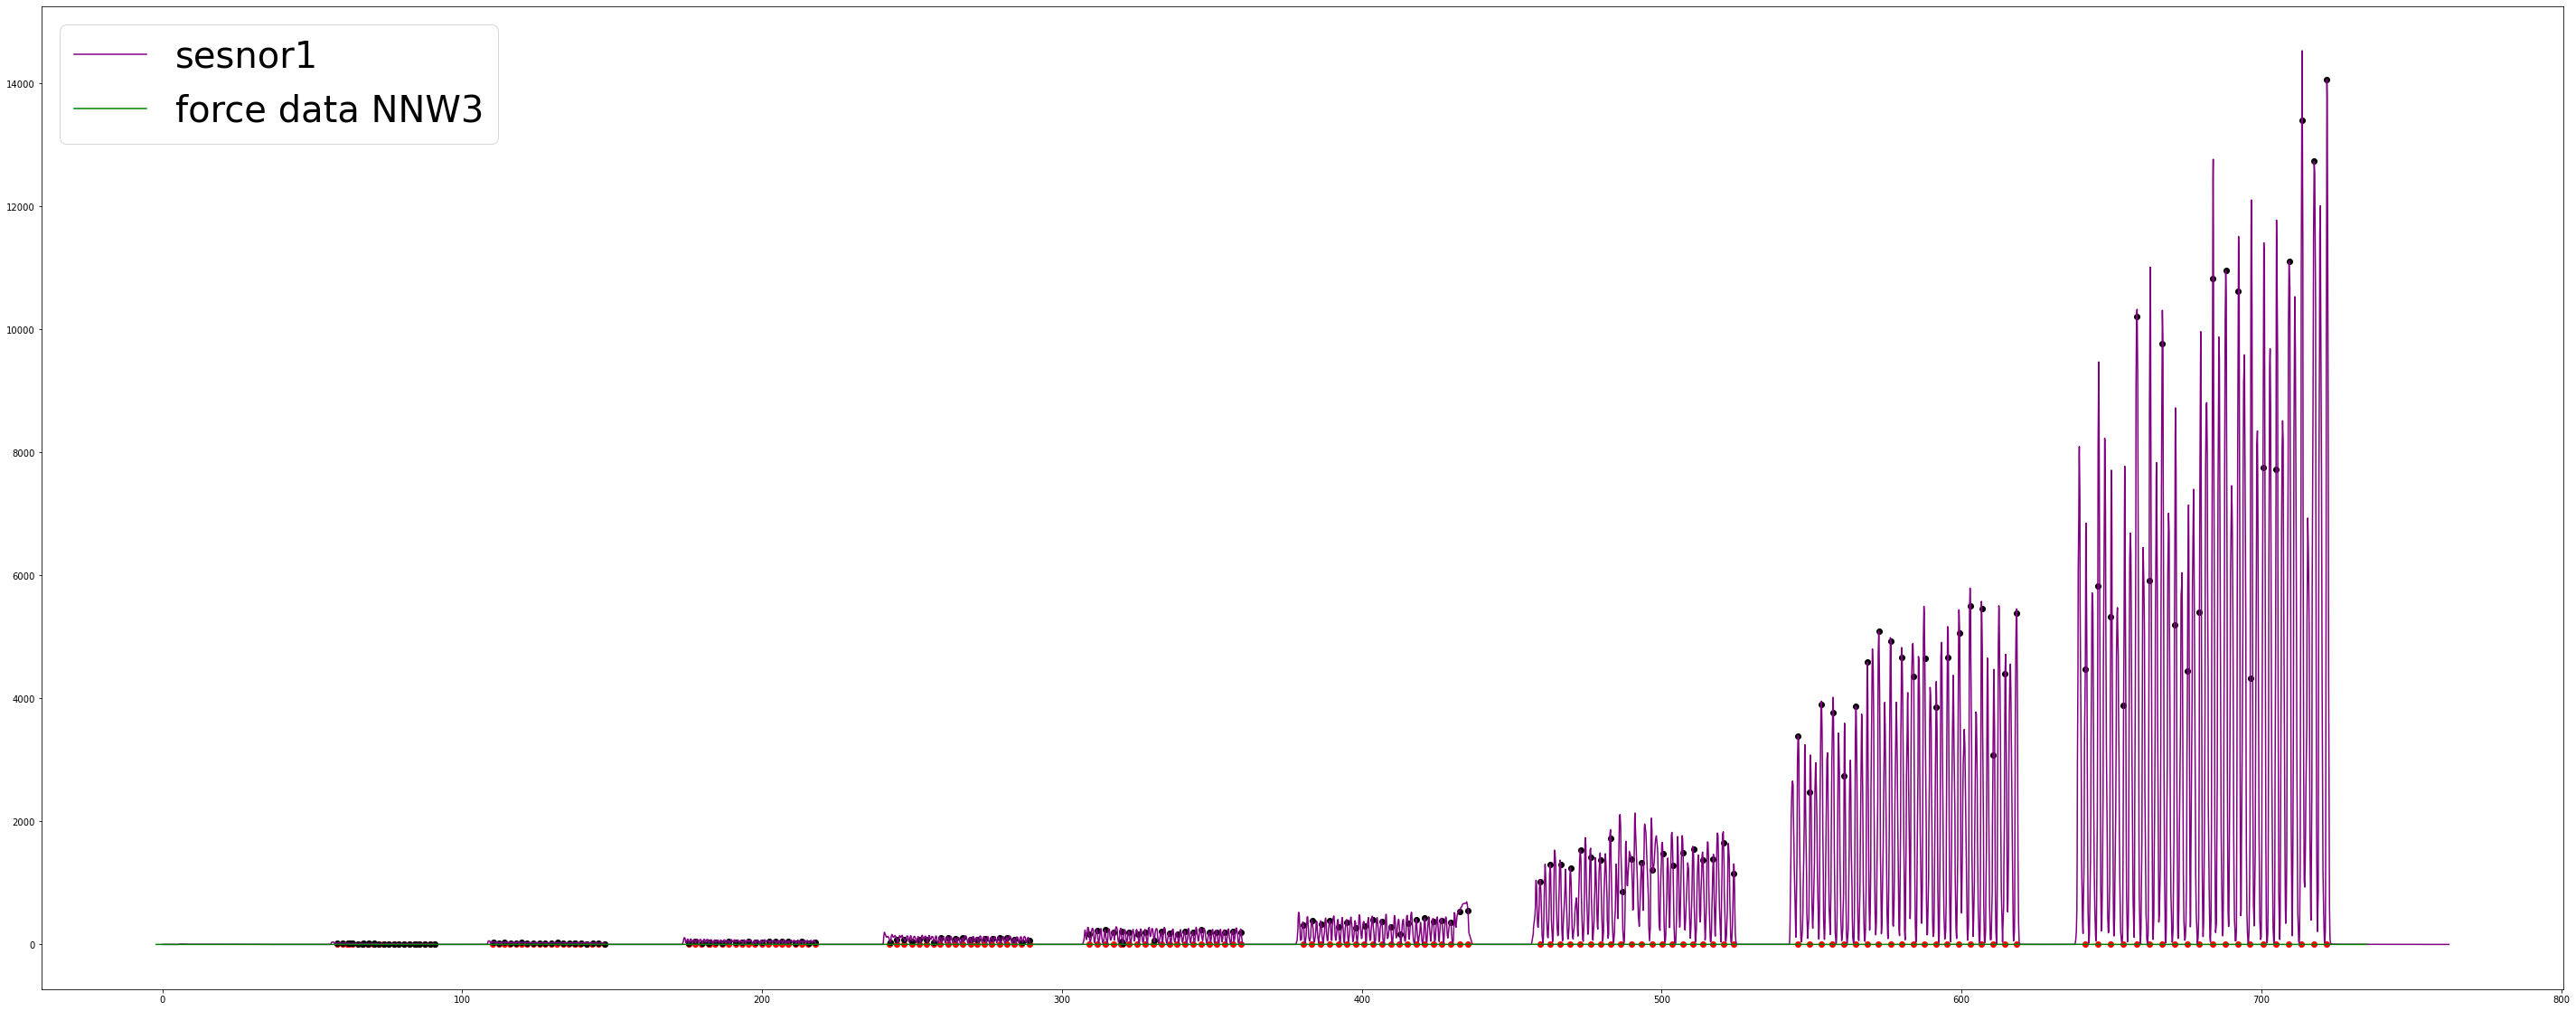

In [18]:
#visualizing the resistance data for each sensor NNW 1- 5 - NNW3

plt.figure(figsize=(50, 20))

# plt.plot(NNW3["Unnamed: 0"],NNW3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNW3["Unnamed: 0"],NNW3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNW3["Unnamed: 0"],NNW3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNW3["Unnamed: 0"],NNW3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNW3 = x_force_NNW3 - 2
scaled_NNW3 = NNW3["Unnamed: 0"]

plt.plot(scaled_NNW3,NNW3["s1_d"], color = 'purple', label = 'sesnor1')
plt.plot(scaled_x_force_NNW3,Load_NNW3,color = 'green', label = 'force data NNW3' )

plt.legend(fontsize=40)

print("Sensor 1 is more profound for NNW3")

#finding the peaks

pidx_Load_NNW3, _ = find_peaks(Load_NNW3,prominence= 0.2 )
peaks_Load_NNW3 = Load_NNW3[pidx_Load_NNW3]
peaks_Ltime_NNW3 = scaled_x_force_NNW3[pidx_Load_NNW3]

plt.scatter(peaks_Ltime_NNW3,peaks_Load_NNW3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNW3time = []

peaks_Ltime_NNW3.reset_index(drop = True, inplace = True)
peaks_Load_NNW3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNW3)):
    idx_NNW3time.append(bisect.bisect_left(NNW3["Unnamed: 0"], peaks_Ltime_NNW3[i]))

plt.scatter(NNW3["Unnamed: 0"][idx_NNW3time],NNW3["s1_d"][idx_NNW3time],color = 'black')

In [19]:
#Storing the peaks into csv file - NNW3
Load_NNW3peaks =[]

for i in range(len(peaks_Load_NNW3)):
    Load_NNW3peaks.append(peaks_Load_NNW3[i])
    
content_NNW3 = {'R1':NNW3["s1_d"][idx_NNW3time],
              'R2':NNW3["s2_d"][idx_NNW3time],
              'R3':NNW3["s3_d"][idx_NNW3time],
              'R4':NNW3["s4_d"][idx_NNW3time], 
              'Load': Load_NNW3peaks} 

df_NNW3 = pd.DataFrame(content_NNW3, columns = ['R1','R2','R3','R4','Load'])

df_NNW3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNW3.csv',index = False, header = True)

Sensor 1 is more profound for NNW4


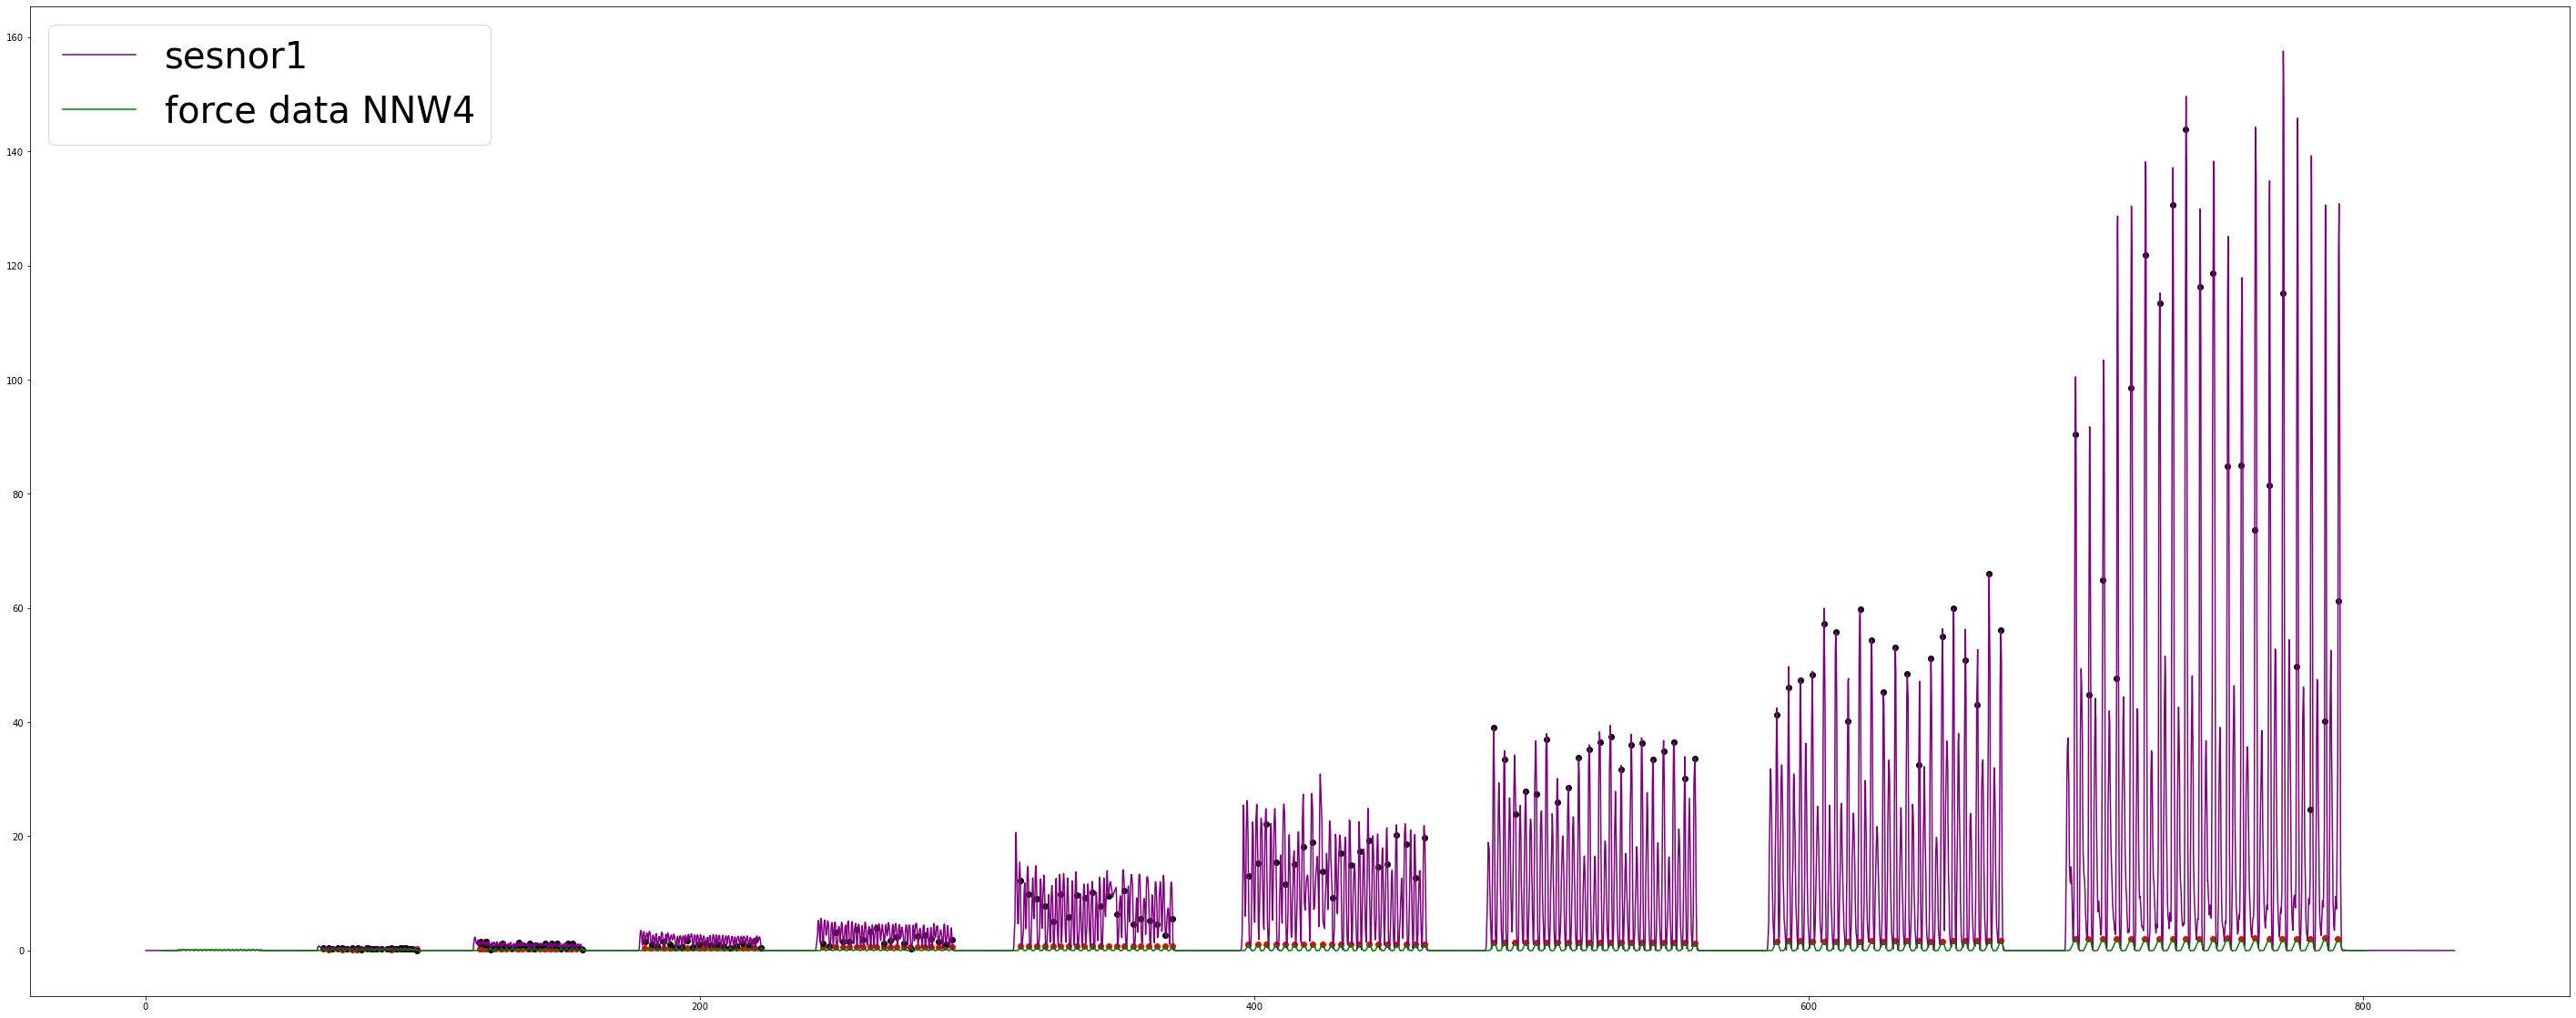

In [24]:
#visualizing the resistance data for each sensor NNW 1- 5 - NNW4

plt.figure(figsize=(50, 20))

# plt.plot(NNW4["Unnamed: 0"],NNW4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNW4["Unnamed: 0"],NNW4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNW4["Unnamed: 0"],NNW4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNW4["Unnamed: 0"],NNW4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNW4 = x_force_NNW4 + 6
scaled_NNW4 = NNW4["Unnamed: 0"]

plt.plot(scaled_NNW4,NNW4["s1_d"], color = 'purple', label = 'sesnor1')
plt.plot(scaled_x_force_NNW4,Load_NNW4,color = 'green', label = 'force data NNW4' )

plt.legend(fontsize=40)

print("Sensor 1 is more profound for NNW4")

#finding the peaks

pidx_Load_NNW4, _ = find_peaks(Load_NNW4,prominence= 0.2 )
peaks_Load_NNW4 = Load_NNW4[pidx_Load_NNW4]
peaks_Ltime_NNW4 = scaled_x_force_NNW4[pidx_Load_NNW4]

plt.scatter(peaks_Ltime_NNW4,peaks_Load_NNW4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNW4time = []

peaks_Ltime_NNW4.reset_index(drop = True, inplace = True)
peaks_Load_NNW4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNW4)):
    idx_NNW4time.append(bisect.bisect_left(NNW4["Unnamed: 0"], peaks_Ltime_NNW4[i]))

plt.scatter(NNW4["Unnamed: 0"][idx_NNW4time],NNW4["s1_d"][idx_NNW4time],color = 'black')

In [25]:
#Storing the peaks into csv file - NNW4
Load_NNW4peaks =[]

for i in range(len(peaks_Load_NNW4)):
    Load_NNW4peaks.append(peaks_Load_NNW4[i])
    
content_NNW4 = {'R1':NNW4["s1_d"][idx_NNW4time],
              'R2':NNW4["s2_d"][idx_NNW4time],
              'R3':NNW4["s3_d"][idx_NNW4time],
              'R4':NNW4["s4_d"][idx_NNW4time], 
              'Load': Load_NNW4peaks} 

df_NNW4 = pd.DataFrame(content_NNW4, columns = ['R1','R2','R3','R4','Load'])

df_NNW4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNW4.csv',index = False, header = True)

Sensor 4 is more profound for NNW5


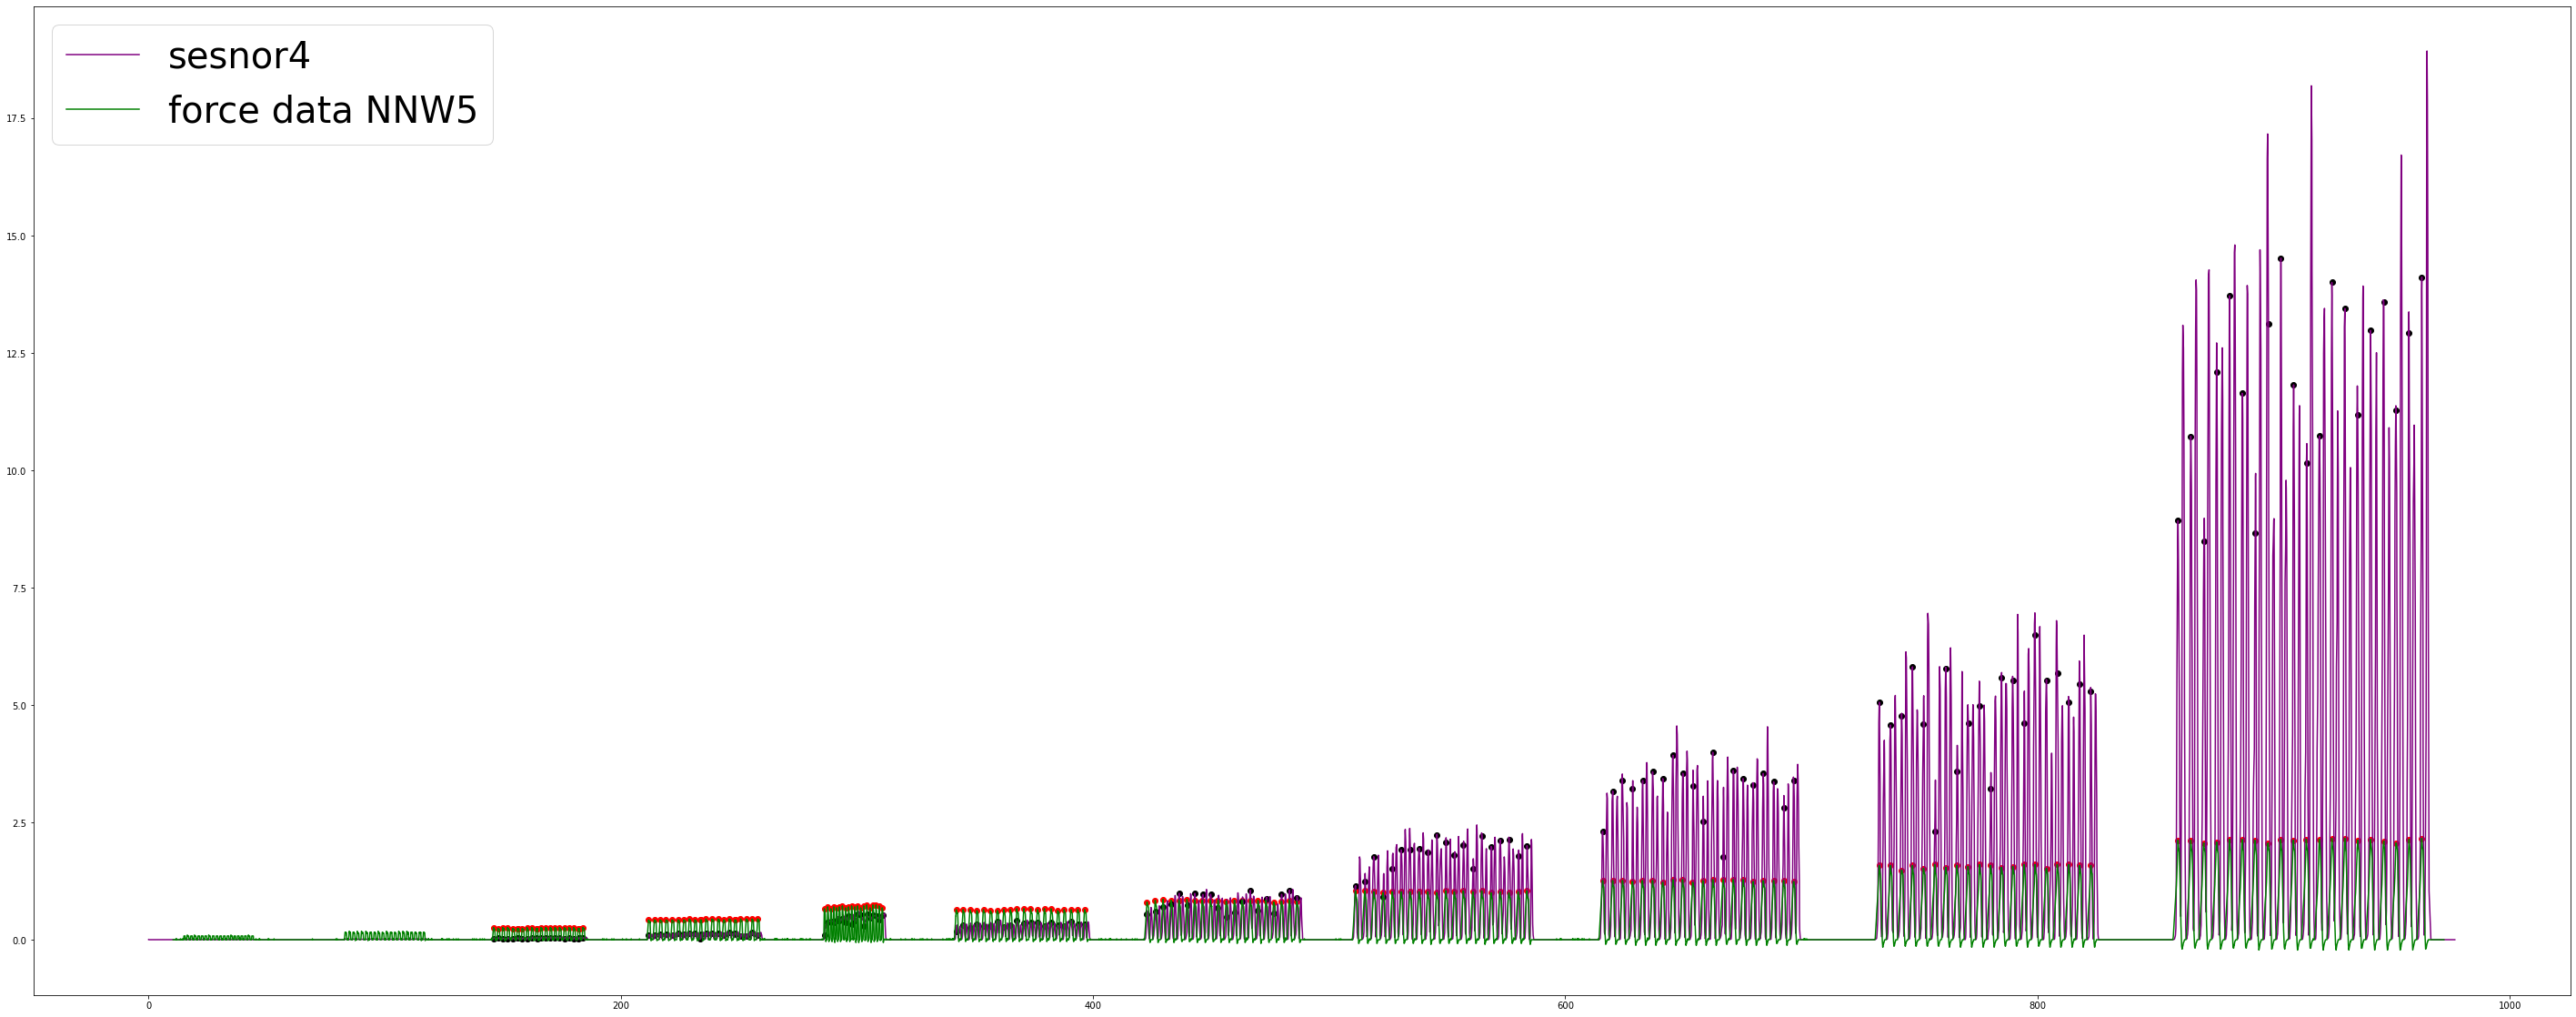

In [29]:
#visualizing the resistance data for each sensor NNW 1- 5 - NNW5

plt.figure(figsize=(50, 20))

# plt.plot(NNW5["Unnamed: 0"],NNW5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNW5["Unnamed: 0"],NNW5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNW5["Unnamed: 0"],NNW5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNW5["Unnamed: 0"],NNW5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNW5 = x_force_NNW5 + 10.5
scaled_NNW5 = NNW5["Unnamed: 0"]

plt.plot(scaled_NNW5,NNW5["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NNW5,Load_NNW5,color = 'green', label = 'force data NNW5')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NNW5")

#finding the peaks

pidx_Load_NNW5, _ = find_peaks(Load_NNW5,prominence= 0.2 )
peaks_Load_NNW5 = Load_NNW5[pidx_Load_NNW5]
peaks_Ltime_NNW5 = scaled_x_force_NNW5[pidx_Load_NNW5]

plt.scatter(peaks_Ltime_NNW5,peaks_Load_NNW5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNW5time = []

peaks_Ltime_NNW5.reset_index(drop = True, inplace = True)
peaks_Load_NNW5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNW5)):
    idx_NNW5time.append(bisect.bisect_left(NNW5["Unnamed: 0"], peaks_Ltime_NNW5[i]))

plt.scatter(NNW5["Unnamed: 0"][idx_NNW5time],NNW5["s4_d"][idx_NNW5time],color = 'black')

In [30]:
#Storing the peaks into csv file - NNW5
Load_NNW5peaks =[]

for i in range(len(peaks_Load_NNW5)):
    Load_NNW5peaks.append(peaks_Load_NNW5[i])
    
content_NNW5 = {'R1':NNW5["s1_d"][idx_NNW5time],
              'R2':NNW5["s2_d"][idx_NNW5time],
              'R3':NNW5["s3_d"][idx_NNW5time],
              'R4':NNW5["s4_d"][idx_NNW5time], 
              'Load': Load_NNW5peaks} 

df_NNW5 = pd.DataFrame(content_NNW5, columns = ['R1','R2','R3','R4','Load'])

df_NNW5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNW5.csv',index = False, header = True)